<a href="https://colab.research.google.com/github/Dinarque/INALCO_Inalco_M2_langage_de_scripts_2024_eleves/blob/main/Corrections/TP1_de_Flaubert_a_FlauBERT_correction_vf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP1 : De Flaubert à FlauBERT**


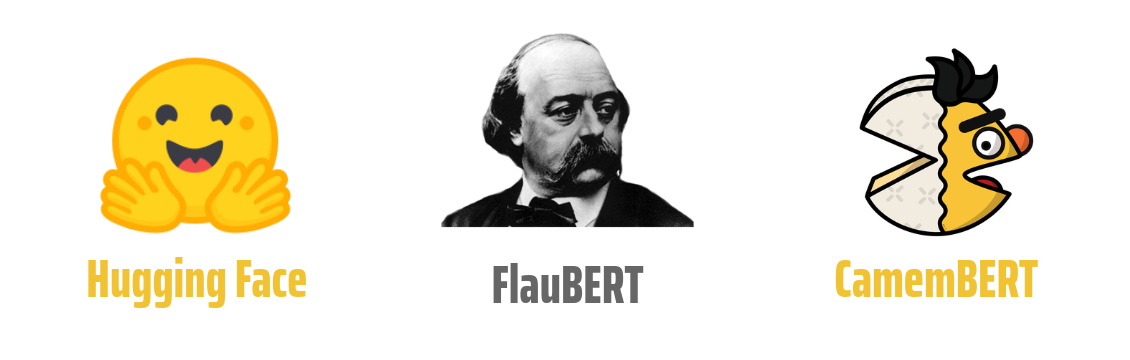

Quelques révisions du programme de première année, et au delà !

**Objectifs : **

1) Réviser les fondamentaux de l'écriture de scripts en python (structures de données et bonnes pratiques), et notamment:
* le téléchargement et l'ouverture de fichiers
* les fonctions essentielles de nettoyage du texte
* le stockage des informations pertinentes dans des structures de données adaptées

2) Savoir comment utiliser python pour répondre à des questions pratiques sur des données. Savoir réfléchir à la manière de découper une question abstraite (Ex: quel est le vocabulaire particulier de Flaubert par rapport aux autres romanciers du 19ième siècle ?) en une liste d'instructions que vous pouvez coder pour obtenir la réponse

3) Etudier (informatiquement) le style de Flaubert, car c'est un des meilleurs auteurs qui soient

# 1) préliminaires pour accéder à l'Education Sentimentale

Pour commencer par le commencement, il faut charger les textes de Flaubert.

In [16]:
flaubert = {
    "Madame_Bovary": "https://www.gutenberg.org/cache/epub/14155/pg14155.txt",
    "L_Education_sentimentale": "https://www.gutenberg.org/cache/epub/49773/pg49773.txt",
    "Bouvard_et_Pecuchet": "https://www.gutenberg.org/cache/epub/14157/pg14157.txt",
    "Salammbô": "https://www.gutenberg.org/cache/epub/48881/pg48881.txt" ,
    "Trois_Contes": "https://www.gutenberg.org/cache/epub/12065/pg12065.txt",
    "Un_Coeur_simple": "https://www.gutenberg.org/cache/epub/26812/pg26812.txt",
    "Dictionnaire_des_idees_recues": "https://www.gutenberg.org/cache/epub/14156/pg14156.txt"
}
flaubert

{'Madame_Bovary': 'https://www.gutenberg.org/cache/epub/14155/pg14155.txt',
 'L_Education_sentimentale': 'https://www.gutenberg.org/cache/epub/49773/pg49773.txt',
 'Bouvard_et_Pecuchet': 'https://www.gutenberg.org/cache/epub/14157/pg14157.txt',
 'Salammbô': 'https://www.gutenberg.org/cache/epub/48881/pg48881.txt',
 'Trois_Contes': 'https://www.gutenberg.org/cache/epub/12065/pg12065.txt',
 'Un_Coeur_simple': 'https://www.gutenberg.org/cache/epub/26812/pg26812.txt',
 'Dictionnaire_des_idees_recues': 'https://www.gutenberg.org/cache/epub/14156/pg14156.txt'}

* Pour ne pas poluer l'onglet du notebook, créez (en codant !!) un répertoire nommé "romans_Flaubert" dans le notebook

In [17]:
!mkdir romans_Flaubert
# pas besoin de mettre des guillements, le symbole "!" permet d'uiliser la cellule de notebook comme une ligne de commande, cela ne fonctionne pas sur un script python en revanche

mkdir: cannot create directory ‘romans_Flaubert’: File exists


* Faites la même chose en python en utilisant la librairie os

In [18]:
import os
if not os.path.exists("romans_Flaubert"):
    os.makedirs("romans_Flaubert")
    print("dossier créé")
else :
  print("le dossier existe déjà")

le dossier existe déjà


* Téléchargez-y en utilisant la librairie urllib le texte de l'Education Sentimentale puis en utilisant la librairie os, saubegardez le roman dans le dossier que vous avez créé

In [19]:
import urllib

# récupérer l'url
url_ES = flaubert["L_Education_sentimentale"]

# chercher le fichier correspondant
filename, headers = urllib.request.urlretrieve(url_ES)
base_name = os.path.basename("L_Education_sentimentale")

# le sauvegarder à l'endroit voulu
saved_path = os.path.join("romans_Flaubert", base_name)
os.rename(filename, saved_path)

* Transformez votre série d'instructions en fonction (qui prend en entrée le nom d'un roman) et téléchargez tous le corpus

In [20]:
def save_novel(novel_name) :
  url_novel = flaubert[novel_name]
  filename, headers = urllib.request.urlretrieve(url_novel)
  base_name = os.path.basename(novel_name)
  saved_path = os.path.join("romans_Flaubert", base_name)
  os.rename(filename, saved_path)

for novel in flaubert :  save_novel(novel)

* écrire une fonction  qui prend en entrée le nom d'un roman et renvoie le texte du roman stocké dans le fichier. La tester sur l'ES et afficher les 500 premières lignes

In [21]:
def lire_roman(nom_roman):
    try:
        # Construire le chemin du fichier
        chemin_fichier = os.path.join("romans_Flaubert", nom_roman)

        # Lire le fichier et renvoyer le contenu
        with open(chemin_fichier, "r", encoding="utf-8") as fichier:
            texte = fichier.read()
        return texte
    except FileNotFoundError:
        return f"Le fichier {nom_roman} n'existe pas dans le dossier romans_Flaubert."


# Exemple d'utilisation
texte_roman = lire_roman("L_Education_sentimentale")
print(texte_roman[:500])

﻿The Project Gutenberg eBook of Œuvres complètes de Gustave Flaubert, tome 3: L'éducation sentimentale, v. 1
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of th


# 2) Nettoyer l'oeuvre du maître


Le texte que nous avons téléchargé n'est pas de la meilleure qualité. Comme vous le voyez on tombe sur un passage en anglais...  Réglons cela !



* Vérifiez que le texte était bien en encodage UTF-8 (vous pouvez utiliser la librairie chardet)

In [22]:
import chardet

path = os.path.join("romans_Flaubert","L_Education_sentimentale")
with open(path, 'rb') as file:
      contenu = file.read()
      # test de l'encodate du texte
      result = chardet.detect(contenu)
result['encoding']

'UTF-8-SIG'

On obtient "UTF-8-SIG" => Tout va bien !

* Enlevez tous les caractères spéciaux (ne conserver que les caractères latins). Quelle librairie pourrait le faire le plus facilement ?



In [23]:
!pip install unidecode

In [24]:
from unidecode import unidecode

texte_roman_clean = unidecode(texte_roman)
print(texte_roman[:500])

﻿The Project Gutenberg eBook of Œuvres complètes de Gustave Flaubert, tome 3: L'éducation sentimentale, v. 1
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of th


* Enlevez tous les contenus textuels qui ne sont pas l'oeuvre de Flaubert (vous pouvez garder les préfaces, que vous encoderez le cas échéant avec la clé "preface" dans la question suivante).
Indice : ils sont en anglais !

In [25]:
!pip install nltk langdetect

In [28]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import sent_tokenize
from langdetect import detect

def enlever_anglais(texte):
    # Diviser le texte en phrases
    phrases = sent_tokenize(unidecode(texte))

    # Filtrer les phrases pour garder uniquement celles en français
    texte_francais = ""
    for phrase in phrases:
        try :
          langue = detect(phrase)
          if langue == 'fr':
                  texte_francais += phrase + " "
        except :
          print("small bug with language detection")
    return texte_francais.strip()

#NB un défaut de la librairie est que si la phrase est petite et contient des mots qui existent dans les deux langues, elle aura tendance à répondre "en" ce qui
# pourrait créer des problèmes, la meilleure solution serait d'envoyer les paragraphes uns à uns mais cela nécessiterait de connaître la structure du document.
# il faudrait d'autres librairies pour cela (TP3)

texte_roman_francais = enlever_anglais(texte_roman_clean)
print(texte_roman_francais[:500])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


La ponctuation n'a pas ete modifiee hormis quelques corrections
  mineures. L'orthographe a ete conservee. Seuls quelques mots ont ete modifies. La liste des modifications se trouve a la fin du texte. EDITION DEFINITIVE D'APRES LES MANUSCRITS ORIGINAUX


  OEUVRES COMPLETES

  DE

  GUSTAVE FLAUBERT


  III

  L'EDUCATION SENTIMENTALE

  I


  PARIS

  A. QUANTIN, IMPRIMEUR-EDITEUR

  RUE SAINT-BENOIT, 7

  1885


  TOUS DROITS RESERVES




PREMIERE PARTIE

L'EDUCATION SENTIMENTALE

I


Le 15 se


# 3) Organiser l'oeuvre

L'objectif de cette partie sera de stocker de manière efficace toute l'oeuvre de Flaubert dans la variable "oeuvre_Flaubert" : un dictionnaire de dictionnaires ayant comme clé le titre du livre (sans accent) et en valeur un dictionnaire ayant comme clé le numéro de chapitre (un chiffre romain) et retournant le texte de ce chapitre.

Remarquez que chaque chapitre est noté par un chiffre romain et est précédé et suivi de deux sauts de ligne.


* écrivez par exemple une fonction prenant en entrée le texte d'un roman et effectuant un split sur les séquences du type deux sauts de ligne, une ligne avec du texte, deux sauts de ligne, et qui renvoie un dictionnaire associant la chaîne de caractère contenue entre les sauts de ligne et lui associe le texte avant la prochaine séparation


In [102]:
# NB : cette fonction est une version finale qui inclut la suppression des segments anglais placée à l'endroit qui était selon moi le plus judicieux.
# C'est la fonction de détection de langue qui est la plus chronophage.

# Une des difficultés est que si le livre contient plusieurs chapitres, alors le chapitre I de la partie II risque d'écraser celui de la partie I dans le dictionnaire. Pour ce faire j'ai ajouté un point dans les clé du dictionnation pour éviter cela.
# Pour éviter cela j'ai ajouté des points pour faire référence à la partie dans laquelle le chapitre se trouve. pas le plus élégant mais efficace
def division_par_chapitre(texte):
    """
    Divise le texte en chapitres en fonction des titres.
    Les titres sont supposés être des chiffres romains (I, II, III, etc.).
    """

    def is_roman_numeral(part):
        """Vérifie si une chaîne est un chiffre romain valide."""
        roman_chars = {"I", "V", "X", "L", "C", "D", "M"}
        return all(c in roman_chars for c in part) and len(part) < 6

    def nettoyer_chapitres(chapitres):
      """
      Supprime les chapitres trop courts (< 100 caractères) et ajuste les clés
      en supprimant les points initiaux pour les titres suivants liés.
      """
      chapitres_nettoyes = chapitres
      titres = sorted(chapitres.keys())  # Parcours ordonné des titres

      for titre in titres:
          contenu = chapitres[titre].strip()

          if len(contenu) < 100:
              # Supprimer le chapitre court et ajuster les titres dépendants
              for autre_titre in list(chapitres.keys()):
                  if autre_titre.endswith(titre):
                      nouveau_titre = autre_titre[1:]
                      chapitres_nettoyes[nouveau_titre] = chapitres_nettoyes.pop(autre_titre)
          else:
              # Conserver le chapitre valide
              chapitres_nettoyes[titre] = contenu

      return chapitres_nettoyes

    parties = texte.split('\n')
    print(f"{len(parties)} paragraphes détectés dans le fichier ")

    chapitres = {"preface": ""}
    titre = "preface"


    for partie in parties:
        suffix = "."
        partie = partie.strip()
        if not partie:
            continue  # Ignore les lignes vides

        # Si la partie est courte et ressemble à un chiffre romain, c'est un titre
        if len(partie) < 4 and is_roman_numeral(partie.upper()):
            # Garantir un titre unique

            if len(chapitres[titre].strip()) > 3000 : # on évite les petites erreurs en s'assurant que les chapitres ont une taille minimale
              while f"{suffix}{partie}" in chapitres:
                  suffix += "."
            titre = f"{suffix}{partie}"
            chapitres[titre] = ""
            print(f"Titre détecté: {titre}")
        else:
            # Ajouter le texte au chapitre courant
            chapitres[titre] += f" {partie}"

    # Nettoyer la préface
    chapitres["preface"] = enlever_anglais(chapitres["preface"].strip())

    return nettoyer_chapitres(chapitres)



chapitres_ES = division_par_chapitre(texte_roman_clean)

9745 paragraphes détectés dans le fichier
Titre détecté: .III
Titre détecté: .I
Titre détecté: .I
Titre détecté: .II
Titre détecté: ..III
Titre détecté: .IV
Titre détecté: .V
Titre détecté: .VI
Titre détecté: ..I
Titre détecté: ..II
Titre détecté: ...III


In [103]:
print(chapitres_ES.keys())
print(chapitres_ES[".III"])

dict_keys(['preface', '.I', '.II', '.IV', '.V', '.VI', '..I', '..II', 'III', '.III', '..III'])
Deux mois plus tard, Frederic, debarque un matin rue Coq-Heron, songea immediatement a faire sa grande visite. Le hasard l'avait servi. Le pere Roque etait venu lui apporter un rouleau de papiers, en le priant de les remettre lui-meme chez M. Dambreuse; et il accompagnait l'envoi d'un billet decachete, ou il presentait son jeune compatriote. Mme Moreau parut surprise de cette demarche. Frederic dissimula le plaisir qu'elle lui causait. M. Dambreuse s'appelait de son vrai nom le comte d'Ambreuse; mais, des 1825, abandonnant peu a peu sa noblesse et son parti, il s'etait tourne vers l'industrie; et, l'oreille dans tous les bureaux, la main dans toutes les entreprises, a l'affut des bonnes occasions, subtil comme un Grec et laborieux comme un Auvergnat, il avait amasse une fortune que l'on disait considerable; de plus, il etait officier de la Legion d'honneur, membre du conseil general de l'Aube

* à votre avis, faut-il mieux utiliser la fonction qui enlève l'anglais avant de procéder au découpage par chapitre ou après sur chaque chapire ? Pourquoi ? Essayez les deux et commentez les résultats

In [ ]:
#Il vaut mieux procéder au découpage avant d'enlever l'anglais car la fonction qui l'enlève supprime les lignes et les \n qui permettent un bon découpage pour capturer les changements de chapitre

# Vous ferez tous seuls les tests des deux directions.

* Pour le dictionnaire des idées reçues, puisque c'est déjà un  dictionnaire dans la forme, stockez-le dans un dictionnaire qui associe à chaque mot sa  définition

Repérez que les mots définis sont en lettres capitales.
Regardez comment se structure le texte et écrivez une fonction pour traiter le dictionnaire spécifiquement

In [104]:
texte_dictionnaire = lire_roman("Dictionnaire_des_idees_recues")
print(texte_dictionnaire)

﻿The Project Gutenberg eBook of Dictionnaire des idées reçues
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Dictionnaire des idées reçues

Author: Gustave Flaubert

Release date: November 26, 2004 [eBook #14156]
                Most recently updated: December 18, 2020

Language: French

Credits: Produced by Ebooks libres et gratuits at http://www.ebooksgratuits.com


*** START OF THE PROJECT GUTENBERG EBOOK DICTIONNAIRE DES IDÉES REÇUES ***




Produced by Ebooks libres et gratuits at http://www.ebooksgratuits.com





Gustave Flaubert
DICTIONNAIRE DES IDÉES REÇUES

Oeuvre posthume (

In [105]:
def traiter_dictionnaire_idees_reçues(texte):

    texte =unidecode(texte).replace("\n"," ")
    lignes = sent_tokenize(texte)

    dictionnaire = {}
    mot = None
    definition = []

    for ligne in lignes:

        ligne = ligne.strip()

        # on coupe chaque ligne selon les deux points qui précèdent la définition
        segments = ligne.split(":")
        mot = segments[0]

        if mot.split(" ")[0].isupper() and len(segments)>1 :
              dictionnaire[mot.strip()] = segments[1]


    return dictionnaire

In [106]:
Dictionnaire_des_idees_recues = traiter_dictionnaire_idees_reçues(texte_dictionnaire)
print(Dictionnaire_des_idees_recues.keys())

dict_keys(['ABSALON', 'ABSINTHE', 'ACADEMIE FRANCAISE', 'ACCIDENT', 'ACCOUCHEMENT', 'ACTRICES', 'ADIEUX', 'ADOLESCENT', 'AFFAIRES (Les)', 'AGENT', 'AGRICULTURE', 'AIL', 'AIR', 'AIRAIN', 'ALBATRE', 'ALBION', 'ALCIBIADE', 'ALCOOLISME', 'ALLEMAGNE', 'ALLEMANDS', 'AMBITIEUX', 'AMBITION', 'AMERIQUE', 'AMIRAL', 'ANGE', 'ANGLAIS', 'ANGLAISES', 'ANTECHRIST', 'ANTIQUITES (les)', 'APLOMB', 'APPARTEMENT de garcon', 'ARBALETE', 'ARCHIMEDE', 'ARCHITECTES', 'ARCHITECTURE', 'ARGENT', 'ARMEE', 'ARSENIC', 'ART', 'ARTISTES', 'ASPIC', 'ASSASSIN', 'ASTRONOMIE', 'ATHEE', 'AUTEUR', 'AUTRUCHE', 'AVOCATS', 'BADAUD', 'BADIGEON dans les eglises', 'BAGNOLET', 'BAGUE', 'BAILLEMENT', 'BALLONS', 'BANDITS', 'BANQUET', 'BANQUIERS', 'BARAGOUIN', 'BARBE', 'BARBIER', 'BAS-BLEU', 'BASES de la societe', 'BASILIQUE', 'BASQUES', 'BATAILLE', 'BATON', 'BAUDRUCHE', 'BAYADERE', 'BEETHOVEN', 'BERGERS', 'BETES', 'BIBLE', 'BIBLIOTHEQUE', 'BIERE', 'BILLARD', 'BLONDES', 'BOIS', "A l'automne, quand on se promene, on doit dire", 'BONN

* écrivez un code qui traite tout le corpus

In [107]:
oeuvre_Flaubert=dict()

for oeuvre in flaubert :
  print(oeuvre)
  if oeuvre == "Dictionnaire_des_idees_recues" :
    oeuvre_Flaubert[oeuvre] = traiter_dictionnaire_idees_reçues(lire_roman(oeuvre))
  else :
    oeuvre_Flaubert[oeuvre] = division_par_chapitre(lire_roman(oeuvre))

Madame_Bovary
15605 paragraphes détectés dans le fichier
Titre détecté: .I
Titre détecté: .II
Titre détecté: .III
Titre détecté: .IV
Titre détecté: .V
Titre détecté: .VI
Titre détecté: .VII
Titre détecté: .IX
Titre détecté: .I
Titre détecté: .II
Titre détecté: .III
Titre détecté: .IV
Titre détecté: .V
Titre détecté: .VI
Titre détecté: .VII
Titre détecté: .IX
Titre détecté: .X
Titre détecté: .XI
Titre détecté: .XII
Titre détecté: .XIV
Titre détecté: .XV
Titre détecté: .I
Titre détecté: .II
Titre détecté: .III
Titre détecté: .IV
Titre détecté: .V
Titre détecté: .VI
Titre détecté: .VII
Titre détecté: .IX
Titre détecté: .X
Titre détecté: .XI
Titre détecté: .I
Titre détecté: ..II
Titre détecté: ..III
Titre détecté: ..IV
Titre détecté: ..V
Titre détecté: ..VI
Titre détecté: ..VII
Titre détecté: ..IX
Titre détecté: ..I
Titre détecté: ...II
Titre détecté: ...III
Titre détecté: ...IV
Titre détecté: ...V
Titre détecté: ...VI
Titre détecté: ...VII
Titre détecté: ...IX
Titre détecté: ..X
Titre dét

* Pour vérifier que tout fonctionne bien, cherchez:
- la liste des textes stockés
- le chapitre 9 de Madame Bovary
- le texte d'un Coeur Simple
- la définition du mot "introduction" dans le Dictionnaire des idées reçues.

In [108]:
oeuvre_Flaubert.keys()

dict_keys(['Madame_Bovary', 'L_Education_sentimentale', 'Bouvard_et_Pecuchet', 'Salammbô', 'Trois_Contes', 'Un_Coeur_simple', 'Dictionnaire_des_idees_recues'])

In [109]:
oeuvre_Flaubert["Madame_Bovary"][".IX"]

"Souvent, lorsque Charles était sorti, elle allait prendre dans l'armoire, entre les plis du linge où elle l'avait laissé, le porte-cigares en soie verte. Elle le regardait, l'ouvrait, et même elle flairait l'odeur de sa doublure, mêlée de verveine et de tabac. À qui appartenait-il?... Au Vicomte. C'était peut-être un cadeau de sa maîtresse. On avait brodé cela sur quelque métier de palissandre, meuble mignon que l'on cachait à tous les yeux, qui avait occupé bien des heures et où s'étaient penchées les boucles molles de la travailleuse pensive. Un souffle d'amour avait passé parmi les mailles du canevas; chaque coup d'aiguille avait fixé là une espérance ou un souvenir, et tous ces fils de soie entrelacés n'étaient que la continuité de la même passion silencieuse. Et puis le Vicomte, un matin, l'avait emporté avec lui. De quoi avait-on parlé, lorsqu'il restait sur les cheminées à large chambranle, entre les vases de fleurs et les pendules Pompadour? Elle était à Tostes. Lui, il était 

In [111]:
" ".join(oeuvre_Flaubert["Un_Coeur_simple"].values())

'Pendant un demi-siècle, les bourgeoises de Pont l\'Evêque envièrent à Mme Aubain sa servante Félicité. Pour cent francs par an, elle faisait la cuisine et le ménage, cousait, lavait, repassait, savait brider un cheval, engraisser les volailles, battre le beurre, et resta fidèle à sa maîtresse, -- qui cependant n\'était pas une personne agréable. Elle avait épousé un beau garçon sans fortune, mort au commencement de 1809, en lui laissant deux enfants très jeunes avec une quantité de dettes. Alors elle vendit ses immeubles, sauf la ferme de Toucques et la ferme de Geffosses, dont les rentes montaient à 5, 000 francs tout au plus, et elle quitta sa maison de Saint-Melaine pour en habiter une autre moins dispendieuse, ayant appartenu à ses ancêtres et placée derrière les halles. Cette maison, revêtue d\'ardoises, se trouvait entre un passage et une ruelle aboutissant à la rivière. Elle avait intérieurement des différences de niveau qui faisaient trébucher. Un vestibule étroit séparait la 

In [110]:
oeuvre_Flaubert["Dictionnaire_des_idees_recues"]['INTRODUCTION']

' Mot obscene.'

# 4) Des questions simples sur un Coeur Simple

* Quelle est l'oeuvre la plus longue de Flaubert ? La plus courte ? Leur longueur moyenne ?

In [114]:
def calculer_longueur(oeuvre) :
  return sum([len(v) for k, v in oeuvre.items()])

longueur_oeuvres = {k: calculer_longueur(v) for k, v in oeuvre_Flaubert.items()}

In [115]:
print(longueur_oeuvres)

{'Madame_Bovary': 699586, 'L_Education_sentimentale': 428461, 'Bouvard_et_Pecuchet': 531797, 'Salammbô': 688876, 'Trois_Contes': 201737, 'Un_Coeur_simple': 86245, 'Dictionnaire_des_idees_recues': 36136}


In [116]:
min_oeuvre = min(longueur_oeuvres, key=longueur_oeuvres.get)
min_value = longueur_oeuvres[min_oeuvre]
print("min", min_oeuvre, min_value)

max_oeuvre = max(longueur_oeuvres, key=longueur_oeuvres.get)
max_value = longueur_oeuvres[max_oeuvre]
print("max", max_oeuvre, max_value)

mean_oeuvre = sum(longueur_oeuvres.values())/len(longueur_oeuvres)
print("mean", mean_oeuvre)

min Dictionnaire_des_idees_recues 36136
max Madame_Bovary 699586
mean 381834.0


Quelle oeuvre comporte le plus de chapitre ? (On exclue bien sur le dictionnaire)

In [117]:
oeuvre_sans_dic = oeuvre_Flaubert
oeuvre_sans_dic.pop("Dictionnaire_des_idees_recues")

{'ABSALON': " S'il eut porte perruque, Joab n'aurait pu le tuer.",
 'ABSINTHE': ' Poison extra-violent',
 'ACADEMIE FRANCAISE': " La denigrer, mais tacher d'en faire partie si on peut.",
 'ACCIDENT': ' Toujours deplorable ou facheux (comme si on devait jamais trouver un malheur une chose rejouissante...).',
 'ACCOUCHEMENT': ' Mot a eviter; le remplacer par evenement.',
 'ACTRICES': ' La perte des fils de famille.',
 'ADIEUX': ' Mettre des larmes dans sa voix en parlant des adieux de Fontainebleau.',
 'ADOLESCENT': ' Ne jamais commencer un discours de distribution des prix autrement que par <<Jeunes adolescents>> (ce qui est un pleonasme).',
 'AFFAIRES (Les)': ' Passent avant tout.',
 'AGENT': ' Terme lubrique.',
 'AGRICULTURE': " Une des mamelles de l'Etat (l'Etat est du genre masculin, mais ca ne fait rien).",
 'AIL': " Tue les vers intestinaux et dispose aux combats de l'amour.",
 'AIR': " Toujours se mefier des courants d'air.",
 'AIRAIN': " Metal de l'antiquite.",
 'ALBATRE': ' Ser

In [118]:
nb_chapitres = dict()
for titres, chaps in oeuvre_Flaubert.items():
  nb_chapitres[titres] = len(chaps)
print(nb_chapitres)

print(max(nb_chapitres))

sorted_nb_chapitres = dict(sorted(nb_chapitres.items(), key=lambda item:item[1],
reverse=True))
print(list(sorted_nb_chapitres.keys())[0])

{'Madame_Bovary': 44, 'L_Education_sentimentale': 11, 'Bouvard_et_Pecuchet': 1, 'Salammbô': 19, 'Trois_Contes': 12, 'Un_Coeur_simple': 6}
Un_Coeur_simple
Madame_Bovary


* Combien y-a-t-il de phrases fans "Un Coeur Simple" ?

In [119]:
coeur_simple = " ".join(oeuvre_Flaubert["Un_Coeur_simple"].values())
print(len(sent_tokenize(coeur_simple)))

797


* Combien-y-a-t-il de mots dans "Un Coeur Simple" ?

In [120]:
from nltk.tokenize import word_tokenize
print(len(word_tokenize(coeur_simple)))

16567


* Et de mots uniques ?  Enlevez les mots les plus fréquents (les stopwords de nltk suffiront)

In [121]:
print(len(set(word_tokenize(coeur_simple))))

4257


* Et de lemmes uniques ? ... Gardons ça pour la partie suivante

# 5) Lemmatisation sentimentale

* Récupérez le texte de l'Education sentimentale

In [122]:
ES = " ".join(oeuvre_Flaubert["L_Education_sentimentale"].values())

* https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer Cette gentille personne a pris de son temps pour coder un lemmatiseur. Faites en sorte de le charger puis créer une fonction qui l'utilise et appliquez là à notre texte  

In [123]:
!pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git

  Cloning https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git to /tmp/pip-req-build-r658s05a
  Running command git clone --filter=blob:none --quiet https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git /tmp/pip-req-build-r658s05a
  Resolved https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git to commit bc0ebd0135a6cc78f48ddf184069b4c0b9c017d8
  Preparing metadata (setup.py) ... done
  Created wheel for FrenchLefffLemmatizer: filename=FrenchLefffLemmatizer-0.3-py3-none-any.whl size=3533514 sha256=d4efc9c28e4d7a581c29c1cf9211c4fb4dd811468719c5fc3d2ff428cb70f714
  Stored in directory: /tmp/pip-ephem-wheel-cache-jp_3n0jj/wheels/99/54/81/553bffdc8e0781c925f9a26606894935adb29b56175a9a358b
Successfully built FrenchLefffLemmatizer


In [124]:
ES

"La ponctuation n'a pas ete modifiee hormis quelques corrections mineures. Seuls quelques mots ont ete modifies. La liste des modifications se trouve a la fin du texte. Le 15 septembre 1840, vers six heures du matin, _la Ville-de-Montereau_, près de partir, fumait à gros tourbillons devant le quai Saint-Bernard. Des gens arrivaient hors d'haleine; des barriques, des câbles, des corbeilles de linge gênaient la circulation; les matelots ne répondaient à personne; on se heurtait; les colis montaient entre les deux tambours, et le tapage s'absorbait dans le bruissement de la vapeur, qui, s'échappant par des plaques de tôle, enveloppait tout d'une nuée blanchâtre, tandis que la cloche, à l'avant, tintait sans discontinuer. Enfin le navire partit; et les deux berges, peuplées de magasins, de chantiers et d'usines, filèrent comme deux larges rubans que l'on déroule. Un jeune homme de dix-huit ans, à longs cheveux et qui tenait un album sous son bras, restait auprès du gouvernail, immobile. A 

In [129]:
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer
from collections import Counter
import re

def lemmatize_oeuvre(texte) :
  # On retire les caractères spéciaux
  texte = re.sub(r"[^-/& \w]|_", "", texte.lower().replace("'"," ").replace("-"," "))
  # On crée une instance du lemmatiseur qu'on utilise pour traiter le texte
  lemmatizer = FrenchLefffLemmatizer()
  lemmatized =  lemmatizer.lemmatize(word=texte)
  distribution = Counter(lemmatized.split())
  sorted_distribution = sorted(distribution.items(), key=lambda x: x[1], reverse=True)
  return sorted_distribution

In [130]:
distribusion_ES = lemmatize_oeuvre(ES)
distribusion_ES

[('de', 2805),
 ('il', 1852),
 ('la', 1696),
 ('et', 1575),
 ('le', 1470),
 ('les', 1305),
 ('un', 1275),
 ('l', 1248),
 ('à', 1243),
 ('d', 1078),
 ('des', 1064),
 ('une', 951),
 ('en', 845),
 ('se', 741),
 ('dans', 656),
 ('elle', 630),
 ('s', 591),
 ('son', 577),
 ('sa', 524),
 ('lui', 498),
 ('frédéric', 493),
 ('au', 454),
 ('sur', 445),
 ('qu', 444),
 ('était', 438),
 ('pour', 429),
 ('pas', 424),
 ('du', 419),
 ('que', 417),
 ('avait', 400),
 ('ses', 389),
 ('arnoux', 378),
 ('n', 373),
 ('on', 372),
 ('ne', 364),
 ('qui', 356),
 ('par', 343),
 ('comme', 343),
 ('avec', 315),
 ('plus', 304),
 ('vous', 299),
 ('est', 286),
 ('ce', 284),
 ('je', 261),
 ('tout', 260),
 ('mais', 251),
 ('y', 214),
 ('c', 210),
 ('a', 205),
 ('dit', 201),
 ('deux', 191),
 ('puis', 190),
 ('bien', 178),
 ('the', 177),
 ('mme', 170),
 ('même', 169),
 ('m', 165),
 ('ils', 165),
 ('sans', 156),
 ('autre', 150),
 ('si', 130),
 ('deslauriers', 128),
 ('là', 126),
 ('où', 123),
 ('chez', 123),
 ('cette', 12

* Etudiez les résultats de cette lemmatisation ? Qu'en pensez-vous ?
Essayez de lemmatiser quelques mots (indice : essayez des verbes conjugués)

In [136]:
lemmatizer = FrenchLefffLemmatizer()
lemmatized =  lemmatizer.lemmatize("offre")
print(lemmatized)

offre


In [134]:
lemmatizer = FrenchLefffLemmatizer()
lemmatized =  lemmatizer.lemmatize(word="ouvrait")
print(lemmatized)

ouvrait


=> Le lemmatiseur est très mauvais avec les verbes. Pour "offre" il ne trouve que le substantif et pas le verbe "offrir", et est incapable de repérer un imparfait.

* Oui, je suis d'accord, il faut aller chercher un autre lemmatiseur...
Prenons simplement celui fourni par Spacy, la librairie NLP à tout faire...




In [138]:
!pip3 install spacy
!python3 -m spacy download fr_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 MB 18.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


* Le pipeline de Spacy crée un objet token.  Quels sont ces champs ? Lequel devez-vous récupérer pour répondre à la question ?

In [139]:
import spacy
nlp = spacy.load('fr_core_news_md')

tokens_in_ES = nlp(ES)
token_43 = tokens_in_ES[42]
print(dir(token_43)) # utile pour voir toutes les possibilités qu'on a , cf cours 6)

['_', '__bytes__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', 'ancestors', 'check_flag', 'children', 'cluster', 'conjuncts', 'dep', 'dep_', 'doc', 'ent_id', 'ent_id_', 'ent_iob', 'ent_iob_', 'ent_kb_id', 'ent_kb_id_', 'ent_type', 'ent_type_', 'get_extension', 'has_dep', 'has_extension', 'has_head', 'has_morph', 'has_vector', 'head', 'i', 'idx', 'iob_strings', 'is_alpha', 'is_ancestor', 'is_ascii', 'is_bracket', 'is_currency', 'is_digit', 'is_left_punct', 'is_lower', 'is_oov', 'is_punct', 'is_quote', 'is_right_punct', 'is_sent_end', 'is_sent_start', 'is_space', 'is_stop', 'is_title', 'is_upper', 'lang', 'lang_', 'left_edge', 'lefts', 'lemma', 'lemma_', 'lex', 'lex_id', 'like_email', 'like

In [ ]:
print(token_43)
print(token_43.lemma)
print(token_43.lemma_)
# Il faut utiliser le champs lemma_ pour obtenir le texte du lemme, le champs lemma renvoie à l'indice du lemme dans la base de spacy

des
12188161997964598936
un


In [140]:
test = nlp("ouvrait")
print(test[0].lemma_) # c'est quand même mieux que le précédent...

ouvrir


* écrire une fonction prenant en entrée un texte et renvoyant la distribution des lemmes

In [141]:
def compute_lemma_distribution(texte) :
  tokens_in_text = nlp(texte)
  distribution = Counter([token.lemma_ for token in tokens_in_text])
  return sorted(distribution.items(), key=lambda x: x[1], reverse=True)

In [143]:
distribution_ES = compute_lemma_distribution(ES)
for lemma, occ in distribution_ES[0:200] :
  print(f" {lemma} appears {occ} times")

 , appears 7389 times
 le appears 5694 times
 de appears 4740 times
 . appears 3365 times
 un appears 2841 times
 il appears 2008 times
 son appears 1583 times
 et appears 1524 times
 à appears 1360 times
 se appears 1329 times
 être appears 1179 times
 ! appears 1157 times
 avoir appears 972 times
 ; appears 956 times
 que appears 855 times
 en appears 841 times
 « appears 743 times
 ne appears 733 times
 » appears 731 times
 lui appears 677 times
 dans appears 656 times
 ce appears 645 times
 Frédéric appears 490 times
 luire appears 469 times
 tout appears 465 times
 au appears 448 times
 sur appears 445 times
 pour appears 424 times
 ? appears 422 times
 pas appears 418 times
 faire appears 387 times
 on appears 370 times
 Arnoux appears 370 times
 : appears 368 times
 qui appears 353 times
 par appears 343 times
 comme appears 339 times
 je appears 336 times
 avec appears 314 times
 pouvoir appears 310 times
 plus appears 303 times
 dire appears 292 times
 vous appears 245 times
 

* Commentez les premiers éléments de cette liste. Comment appelle-t-on ce genre de mots ? Que faire ? Modifiez la fonction en conséquence.



In [145]:
# Les signes de ponctuation ont été pris en compte, il faut les retirer

def compute_lemma_distribution_2(texte) :
  tokens_in_text = nlp(texte)
  distribution = Counter([token.lemma_ for token in tokens_in_text if not token.is_stop and not token.is_punct] )
  return sorted(distribution.items(), key=lambda x: x[1], reverse=True)

In [147]:
distribution_ES_2 = compute_lemma_distribution_2(ES)
for lemma, occ in distribution_ES_2[0:50] :
  print(f" {lemma} appears {occ} times")

 Frédéric appears 490 times
 Arnoux appears 370 times
 faire appears 281 times
 être appears 191 times
 bien appears 176 times
 mme appears 169 times
 the appears 164 times
 grand appears 155 times
 femme appears 135 times
 voir appears 131 times
 Deslauriers appears 127 times
 prendre appears 125 times
 homme appears 121 times
 petit appears 121 times
 avoir appears 121 times
 venir appears 120 times
 aller appears 118 times
 chose appears 114 times
 of appears 114 times
 vouloir appears 112 times
 trouver appears 110 times
 m. appears 109 times
 rien appears 104 times
 passer appears 96 times
 jour appears 94 times
 fois appears 90 times
 heure appears 86 times
 savoir appears 86 times
 mettre appears 84 times
 bon appears 84 times
 main appears 83 times
 Gutenberg appears 82 times
 Project appears 80 times
 oeil appears 79 times
 air appears 77 times
 to appears 77 times
 -ce appears 76 times
 rue appears 75 times
 jeune appears 73 times
 jusque appears 73 times
 contre appears 73 t

# 6) Les adjectifs d'Emma

Le but de cette question est de trouver tous les adjectifs utilisés par Flaubert pour décrire Mme Bovary.

* Chargez le texte de Mme Bovary

In [148]:
Bovary = " ".join(oeuvre_Flaubert["Madame_Bovary"].values())

Quels sont tous les personnages principaux de l'oeuvre ? Indice : utiliser un système de NER
Quels sont tous les noms du personnage principal ? Commentez les résultats.
On ne fera pas mieux ce n'est pas l'essentiel.

In [149]:
def detecte_personnages(texte):

    doc = nlp(texte)
    personnages = [ent.text for ent in doc.ents if ent.label_ == 'PER'] # On utilise le système de NER inclus dans Spacy
    distribution = Counter(personnages)

    return sorted(distribution.items(), key=lambda x: x[1], reverse=True)

In [150]:
persos_Bovary = detecte_personnages(Bovary)
persos_Bovary

# Le système est bon mais il y a quelques erreurs.
# Toutefois elles ne concernent que les éléments de faible cardinalité, donc en ne retenant que les personnages apparaissant plus de 3 fois on a de très bons résultats

[('Emma', 363),
 ('Charles', 312),
 ('Rodolphe', 108),
 ('Léon', 78),
 ('Madame', 47),
 ('Justin', 36),
 ('M. Homais', 31),
 ('Binet', 31),
 ('père Rouault', 27),
 ('Hippolyte', 25),
 ('Monsieur', 24),
 ('M. Lheureux', 24),
 ('Lheureux', 24),
 ('madame Homais', 23),
 ('Berthe', 22),
 ('Lefrançois', 19),
 ('Canivet', 19),
 ('Félicité', 18),
 ('Bertaux', 18),
 ('Lestiboudois', 16),
 ('madame Lefrançois', 14),
 ('Hivert', 13),
 ('Bournisien', 13),
 ('M. Léon', 11),
 ('madame Bovary', 11),
 ('Tuvache', 11),
 ('M.', 10),
 ('Vinçart', 10),
 ('Rolet', 10),
 ('madame Tuvache', 9),
 ('M. Guillaumin', 9),
 ('madame', 8),
 ('M. Bournisien', 8),
 ('Athalie', 8),
 ('Adieu', 8),
 ('M. Boulanger', 8),
 ('Aveugle', 7),
 ('Bridoux', 7),
 ('Napoléon', 7),
 ('Artémise', 6),
 ('Voltaire', 6),
 ('M. Binet', 6),
 ('Vicomte', 6),
 ('Huchette', 6),
 ('Marquis', 6),
 ('M. Tuvache', 5),
 ('Théodore', 5),
 ('Allons', 5),
 ('Langlois', 5),
 ('Lucie', 5),
 ('M. Canivet', 4),
 ('Monseigneur', 4),
 ('M. Rouault', 4)

In [151]:
noms_Emma = ["emma", "madame bovary", "madame"]
noms_Charles = ["charles", "monsieur bovary", "monsieur"]

* Trouvez maintenant tous les adjectifs qui sont utilisés pour décrire Madame Bovary.

(indice : utilisez un système de POS TAGGING)
(indice 2: sélectionnez les adjectifs et regardez leur tête)

In [154]:
# Codez une fonction prenant en paramètre une liste de noms de personnages et renvoyant les adjectifs utilisés

def trouver_adjectifs_emma(texte):

    doc = nlp(texte)
    adjectifs = []

    # On repère tous les mots qui sont des adjectifs et on sauvegarde leur tête
    for token in doc:
        # sélectionner les adjectifs
        if token.pos_ == "ADJ":
            # Si leur tête est un des noms d'Emma, l'ajouter
            if token.head.text.lower() in [n.lower() for n in noms_Emma]:
                adjectifs.append(token.text)

    return list(set(adjectifs))

In [155]:
print(trouver_adjectifs_emma(Bovary))

# On trouve a priori extrêmement peu d'adjectifs pour 600 occurrences du personnage

['jolie', 'anxieuse', 'pauvre', 'fraîche', 'lasse', 'limpide', 'silencieuse', 'excellente', 'éblouie', 'faible', 'chère', 'Tuvache', 'jeune', 'tendre', 'large']


* Analysez les résultats. Qu'en pensez-vous ?
écrivez une fonction qui parse un texte, sélectionne les adjectifs et retourne la liste des tuples contenant un adjectif et sa tête ? QUe constatez-vous ?

In [173]:
from tqdm.auto import tqdm

def extraire_adjecifs_et_tete_spacy(text):
    doc = nlp(text)

    adj_head_pairs = []

    for token in tqdm(doc):
        # sélectionner les adjectifs
        if token.pos_ == "ADJ":
            # Si leur tête est un des noms d'Emma, l'ajouter
            adj_head_pairs.append((str(token.text), str(token.head)))

    return adj_head_pairs

* Effectivement spacy ne donne pas de bons résultats. Utilisez le module de l'université de Stanford (stanza) et refaires le même travail

In [174]:
!pip install stanza
import stanza
stanza.download('fr')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: fr (French) ...
INFO:stanza:File exists: /root/stanza_resources/fr/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [175]:
nlp_stanza = stanza.Pipeline('fr', processors='tokenize,mwt,pos,lemma,depparse')

def extraire_adjecifs_et_tete_stanza(text):

    doc = nlp_stanza(text)
    adj_head_pairs = []

    for sentence in tqdm(doc.sentences):
        for word in sentence.words:
            if word.upos == 'ADJ':
                head_word = sentence.words[word.head - 1] if word.head > 0 else None
                if head_word:
                    adj_head_pairs.append((word.text.lower(), head_word.text.lower()))

    return adj_head_pairs

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: fr (French):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during un

* Exécutez les deux fonctions sur Charles et Emma.
Que pouvez-vous dire des résultats ?

In [176]:
adj_spacy = extraire_adjecifs_et_tete_spacy(Bovary)
adj_stanza = extraire_adjecifs_et_tete_stanza(Bovary)

In [177]:
adj_emma_spacy = [tup[0] for tup in adj_spacy if tup[0].lower().strip() in noms_Emma ]
print("spacy : ", adj_emma_spacy)
adj_emma_stanza = [tup[0] for tup in adj_stanza if tup[1].lower().strip() in noms_Emma ]
print("stanza : ", adj_emma_stanza)

spacy :  []
stanza :  ['anxieuse', 'désespérée', 'jeune', 'jeune', 'limpide', 'ivre', 'couchée', 'silencieuse', 'silencieuse', 'chère', 'faible', 'prête', 'pauvre', 'excellente']


* Pensez un algorithme qui compare le résultat des deux systèmes, calcule un pourcentage de concordance et de discordances sur les têtes et renvoie la liste de réponses différentes. Bon exercice pour réviser les structures de données !

In [178]:
print(len(adj_spacy))
print(adj_spacy[2])
print(len(adj_stanza))
print(adj_stanza[1])

nombre_de_tuples_communs = len

6430
('grand', 'pupitre')
5696
('grand', 'pupitre')


In [179]:
def comparer_systemes(adj_spacy, adj_stanza):
    # Convertir en ensembles pour comparaison rapide
    set_spacy = set(adj_spacy)
    set_stanza = set(adj_stanza)

    # Calculer les concordances et discordances
    concordances = set_spacy & set_stanza
    discordances = (set_spacy | set_stanza) - concordances

    # Calculer les pourcentages
    total_comparisons = len(set_spacy | set_stanza)
    pourcentage_concordance = (len(concordances) / total_comparisons) * 100
    pourcentage_discordance = (len(discordances) / total_comparisons) * 100

    # Liste des divergences (présent dans l'un mais pas l'autre)
    divergences = list(discordances)

    return pourcentage_concordance, pourcentage_discordance, divergences

comparer_systemes(adj_spacy, adj_stanza)

(54.478273721548916,
 45.521726278451084,
 [('féroce', 'féroce'),
  ('écales', 'bateaux'),
  ('suaves', 'paresses'),
  ('chancelante', 'étourdie'),
  ('paisibles', 'paisibles'),
  ('rogue', 'ton'),
  ('épanouies', 'faces'),
  ('PARAGRAPH', 'IN'),
  ('ennuyeuse', 'campagne'),
  ('mou', 'mou'),
  ('seule', 'revoie'),
  ('bourgeois', 'rougir'),
  ('bonne', 'dit'),
  ('Toutes', 'personnes'),
  ('petite', 'Bovary'),
  ('petite', 'bovary'),
  ('mourant', 'Bayard'),
  ('levant', 'soleil'),
  ('tendre', 'lectures'),
  ('anxieuse', 'entrée'),
  ('bourrus', 'cossus'),
  ('ecclésiastique', 'écria'),
  ('tendres', 'pieds'),
  ('régulier', 'lui'),
  ('bonne', 'reprit'),
  ('pharmaceutiques', 'destiné'),
  ('crevé', 'quarts'),
  ('digne', 'une'),
  ('hérissant', 'tenaient'),
  ('garrotté', 'homme'),
  ('hâlé', 'front'),
  ('faible', 'emma'),
  ('bleu', 'tablier'),
  ('autres', 'produits'),
  ('droit', 'pied'),
  ('souple', 'quelque'),
  ('monstrueux', 'Sommes'),
  ('abominables', 'maître'),
  ('blan

* Notre système ne renvoie que peu de réponses... ce qui est en fait logique. pourquoi ? Comment faire pour avoir la vraie réponse à notre question littéraire

In [ ]:
"""
Une vingtaine d'adjectifs pour un roman pareil, c'est peu !
La raison est peut être que l'on ne considère qu'une partie des références aux personnages. Il faudrait effectuer une résolution de coréférence pour également
repérer les pronoms qui réfèrent à Charles et Emma et ajouter les adjectifs liés à ces pronoms.
"""

* BONUS : Implémentez cette solution




* BONUS : proposez un protocole pour évaluer les différents systèmes sur notre tâche précise (repérer tous les adjectifs d'un texte et déterminer correctement leur tête) et uilisez-le pour évaluer les deux systèmes

# 7) spécificités du vocabulaire flaubertien

Le but de cette partie est d'étudier la spécificié du texte de flaubert par rapport à d'autres auteurs de la même époque.  Pour cela on va télécharger un corpus d'auteurs du XIX ième siècle.



* téléchargez le corpus CIDRE

https://www.ortolang.fr/market/corpora/cidre
https://github.com/oseminck/cidre/tree/main/CIDRE

écrivez une fonction qui charge tous les textes contenus dans chaque sous dossier de ce dossier dans un dossier nommé cidre. Affichez la liste des fichiers des textes qui sont là. comptez le nombre de texte. (en bash sinon ce n'est pas drôle)

In [180]:
!mkdir cidre
!git clone https://github.com/oseminck/cidre.git
!cd cidre/CIDRE

Cloning into 'cidre'...
remote: Enumerating objects: 500, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 500 (delta 22), reused 106 (delta 18), pack-reused 390 (from 1)
Receiving objects: 100% (500/500), 77.87 MiB | 20.65 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (427/427), done.


In [181]:
!for d in cidre/CIDRE/*/; do echo "Files in $d:"; ls "$d"; done

Files in cidre/CIDRE/aimard/:
1858_Le_chercheur_de_pistes.epub.txt	   1869_Le_forestier.epub.txt
1858_Le_Grand_Chef_des_Aucas.epub.txt	   1874_La_Belle-Riviere.epub.txt
1858_Les_pirates_des_prairies.epub.txt	   1876_Le_Chasseur_de_rats.epub.txt
1858_Les_trappeurs_de_l_Arkansas.epub.txt  1876_Le_commandant_Delgres.epub.txt
1859_La_loi_de_Lynch.epub.txt		   1877_L_Olonnais.epub.txt
1859_L_eclaireur.epub.txt		   1877_Vent-en-Panne.epub.txt
1861_Les_Rodeurs_de_frontieres.epub.txt    1878_L_Aigle-Noir_des_Dacotahs.epub.txt
1864_Le_Guaranis.epub.txt		   1878_Le_Mangeur_de_poudre.epub.txt
1865_Les_bohemes_de_la_mer.epub.txt	   1879_Coeur-de-Panthere.epub.txt
1866_Les_pieds-fourchus.epub.txt	   1879_Les_Forestiers_du_Michigan.epub.txt
1867_Jim_l_Indien.epub.txt		   1879_Les_Terres_d_Or.epub.txt
1868_Ourson_Tete-de-Fer.epub.txt	   1881_Les_bandits_de_l_Arizona.epub.txt
Files in cidre/CIDRE/balzac/:
 1829_Les_Chouans.txt
 1830_Gobseck.txt
 1830_La_Maison_du_chat-qui-pelote.txt
 1830_La_Vendetta.

In [182]:
!find cidre/CIDRE -type f | wc -l

422


Pour repérer le vocabulaire propre à Flaubert, nous allons:
* constituer un corpus 19 ieme siecle (liste de texte, chaque élément de la liste correspond à une oeuvre) et un corpus de Flaubert
* utiliser tf idf pour trouver les mots du corpus de Flaubert qui ne sont pas usuels dans l'autre

* écrivez une fonction qui parcourt le corpus cidre et renvoie un dictionnaire associant le nom du fichier txt au texte qu'il contient.



In [183]:
def charger_textes_cidre(dossier_cidre):

    textes = {}

    # Parcourt chaque sous-dossier et fichier
    for sous_dossier, dirs, fichiers in os.walk(dossier_cidre):
        for fichier in fichiers:
            if fichier.endswith('.txt'):
                chemin_fichier = os.path.join(sous_dossier, fichier)
                try:
                    with open(chemin_fichier, 'r', encoding='utf-8') as f:
                        textes[fichier] = f.read()
                except Exception as e:
                    print(f"Erreur lors de la lecture de {chemin_fichier}: {e}")

    return textes

# Exemple d'utilisation
dossier_cidre = "/content/cidre/CIDRE"

corpus_cidre = charger_textes_cidre(dossier_cidre)
print(len(corpus_cidre))

421


In [192]:
corpus_flaubert = dict()
for texte in flaubert :
  corpus_flaubert[texte]=enlever_anglais(lire_roman(texte))

small bug with language detection
small bug with language detection
small bug with language detection
small bug with language detection


*  Créez un corpus global

In [193]:
corpus_global = corpus_cidre
corpus_global.update(corpus_flaubert)  # Il faut ajouter le corpus de flaubert dans le corpus global sinon on ne peut pas voir la spécificité de flaubert par rapport au tout

In [194]:
print(corpus_flaubert.keys())

dict_keys(['Madame_Bovary', 'L_Education_sentimentale', 'Bouvard_et_Pecuchet', 'Salammbô', 'Trois_Contes', 'Un_Coeur_simple', 'Dictionnaire_des_idees_recues'])


* rensegnez vous sur le tf idf vectorizer de scikit learn et utilisez-le pour répondre à la question : quels sont les 100 mots les plus idiomatiques de Flaubert



In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# L'idée est de calculer le score de spécificité des mots et de voir la différence de spécificité des mots entre les deux corpora.

def trouver_vocabulaire_specifique(corpus_global, corpus_flaubert) :
  # Initialiser le vectorizer pour le corpus global et Flaubert
  vectorizer_global = TfidfVectorizer(max_df=0.8, min_df=2)
  vectorizer_flaubert = TfidfVectorizer(max_df=0.8, min_df=2)

  # Calculer la matrice TF-IDF pour les deux corpus
  tfidf_matrix_global = vectorizer_global.fit_transform(list(corpus_global.values()))
  tfidf_matrix_flaubert = vectorizer_flaubert.fit_transform(list(corpus_flaubert.values()))

  # Extraire les termes des deux corpus
  terms_global = vectorizer_global.get_feature_names_out()
  terms_flaubert = vectorizer_flaubert.get_feature_names_out()

  # Calculer la somme des scores TF-IDF pour chaque terme
  tfidf_scores_global = np.sum(tfidf_matrix_global.toarray(), axis=0)
  tfidf_scores_flaubert = np.sum(tfidf_matrix_flaubert.toarray(), axis=0)

  # Créer un dictionnaire pour associer termes et scores dans le corpus global
  dict_global = dict(zip(terms_global, tfidf_scores_global))

  # Comparer les termes dans le corpus Flaubert par rapport au corpus global
  specific_terms = []
  for i, term in enumerate(terms_flaubert):
      if term in dict_global:
          score_diff = tfidf_scores_flaubert[i] - dict_global[term]
          specific_terms.append((term, score_diff))

  # Trier les termes par spécificité décroissante (différence de score)
  sorted_specific_terms = sorted(specific_terms, key=lambda x: x[1], reverse=True)

  # Obtenir les 100 termes les plus spécifiques à Flaubert
  top_100_specific_terms = sorted_specific_terms[:100]

  # Afficher les résultats
  for term, score in top_100_specific_terms:
      print(f"{term}: {score}")

In [196]:
trouver_vocabulaire_specifique(corpus_global, corpus_flaubert)

# On constate la présence de beaucoup de noms propres qu'il faudrait retirer !
# et quelques artefacts (ebooks !) liés au nettoyage imparfait, mais c'est pas mal pour un début !

frederic: 0.29532950392238744
barbares: 0.18951490533116228
bovary: 0.15411174988485554
aubain: 0.13934689079923934
leon: 0.11762414431277274
tetrarque: 0.09788409462366612
bourais: 0.07141540807920957
abbe: 0.05888765563401218
armee: 0.05752762488045593
champetre: 0.05402399754330449
moloch: 0.05054604198949664
ecclesiastique: 0.04516727983423628
museum: 0.04399143345268536
republique: 0.04243264063941213
pretre: 0.04114434547276076
ecria: 0.039616076953914114
grace: 0.03899369545197526
toucques: 0.038454450504189774
theatre: 0.03729721115015011
eleves: 0.03710423179345289
fenetre: 0.03575366604311328
deesse: 0.03536192848054444
loulou: 0.03345230167297686
trouverent: 0.03312293374897909
completement: 0.02923241775157681
liebard: 0.028989777301316383
verite: 0.0286679437545466
platre: 0.02847517923480241
elephants: 0.027364240465321252
honfleur: 0.026980082714688797
temperament: 0.026252475381301398
chercherent: 0.026197022623214793
especes: 0.025965094097224948
creation: 0.0250708416

Même question sur les verbes de Flaubert, et ses adjectifs

In [ ]:
"""
Deux approches acceptées :
POS tagging puis sélection des mots de la classe grammaticale avant de passer par TFIDF, ou sélection après à la sortie de la liste
il est mieux de donner un texte lemmatisé
"""

# 8) Une question de genre : Madame Bovary est-elle un roman féminin ?

L'article qui suit traite de la représentation du genre dans le roman français.

https://aclanthology.org/2022.jeptalnrecital-humanum.8.pdf

Il y aurait selon les auteurs des critères stylistiques permettant de déterminer si le roman a été écrit par un homme ou une femme, quitte à démasquer des pseudonymmes !

* Lisez l'article. Quels sont les caractéristiques stylistiques ou formels qui différencieraient un roman écrit par un homme d'un roman écrit par une femme selon les conclusions des auteurs.

* Nous nous intéresserons particulièrement à la section 4 intitulée  "Explorations textométriques : spécificités liées aux genres"
renseignez vous sur  l’indice de spécificité (SP) de Lafon.
Trouvez ou proposez une implémentation, et testez là sur un roman de Flaubert

In [ ]:
#NB nettoyer et lemmatisez avant

In [204]:
def distribution_lemmas(corpus):
    text = ' '.join(corpus)
    words = word_tokenize(text.lower().replace("_", " "))
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return Counter(lemmatized_words)

def specificity_index(general_corpus, specialized_corpus):
    # Compter les termes dans chaque corpus
    general_counts = distribution_lemmas(general_corpus)
    specialized_counts = distribution_lemmas(specialized_corpus)

    # Calculer le nombre total de mots dans chaque corpus
    total_general_words = sum(general_counts.values())
    total_specialized_words = sum(specialized_counts.values())

    # Calculer l'indice de spécificité pour chaque terme spécialisé
    specificity_indices = {}
    for term in tqdm(specialized_counts):
        fs = specialized_counts[term] / total_specialized_words
        fg = general_counts[term] / total_general_words if term in general_counts else 0
        if fg > 0:
            specificity_indices[term] = fs / fg
        else:
            specificity_indices[term] = float('inf')  # Le terme n'existe pas dans le corpus général
    sorted_indices = sorted(specificity_indices.items(), key=lambda x: x[1], reverse=True)
    return sorted_indices

# NB finalement cette méthode est plus "basique" que le TF idf de la question précédente car on considère seulement le nombre d'occurrence des mots et pas leur fréquence relative
# mais il s'agit de reproduire les résultats d'un article et vous avez réimplémneté le calcul de l'indice contrairement à la question précédente


In [ ]:
indices = specificity_index(list(corpus_global.values()),list(corpus_flaubert.values()))
print(indices)

In [ ]:
* Ne lemmatisez pas et ne retenez que les noms.
Vous semblent-t-ils a priori plus masculins ou féminins ?

* Utilisez un outil d'analyse morphologique pour étudier le genre des mots.
Calculez la proportion de mots masculins et féminins dans les romans de flaubert, et dans le corpus. La différence est-elle significative ?
Et dans Mme Bovary uniquement ?


* BONUS : Lisez la section 5 de l'article. Tentez de redémontrer la conclusion de l'article ": en moyenne, les
 romanciers et romancières mentionnent plus souvent les personnages de leur propre genre." Pour cela prenez au hasard un roman du corpus CIDRE écrit par un homme et un écrit par une femme, de longueur similaire

 Pour cela:
 * téléchargez le modèle disponible sur Ortolang
 * appliquez-le à Mme Bovary, à tout le corpus de Flaubert et tout le corpus.
 * recalculez le pourcentage de termes masculin, féminins et neutres
 * conclure

#9) FlauBERT : une introduction

C'est le moment de charger sur votre Notebook le Flaubert des temps modernes !
https://aclanthology.org/2020.jeptalnrecital-taln.26.pdf


* Consultez la documentation du site Hugging Face et chargez le tokenizer associé à Flaubert sur votre machine sur votre machine.
Tokenisez une phrase de Flaubert

In [199]:
!pip install sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 13.8 MB/s eta 0:00:00


In [200]:
import torch

try:
  from transformers import AutoModel, AutoTokenizer
except ImportError:
  !pip install transformers
  from transformers import AutoModel, AutoTokenizer

tokenizer_flaubert = AutoTokenizer.from_pretrained("flaubert/flaubert_base_cased")
tokenizer_flaubert.tokenize("Il était une fois le mariage d'Emma")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.56M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/896k [00:00<?, ?B/s]

['Il</w>',
 'était</w>',
 'une</w>',
 'fois</w>',
 'le</w>',
 'mariage</w>',
 "d'</w>",
 'Emma</w>']

* Nous allons créer un mini moteur de recherche sémantique qui va nous servir à rechercher des phrases dans un texte.

Pour cela:
* écrivez une fonction qui transforme une phrase en vecteur avec FlauBERT
* écrivez une fonction qui prend en entrée un texte et renvoie un dictionnaire associant chaque phrase à son vecteur
* écrivez une fonction prenant en entrée un dictionnaire de ce type et une phrase et renvoie la phrase du texte la plus similaire (selon la métrique de cosine similarity)

In [201]:
tokenizer = AutoTokenizer.from_pretrained('flaubert/flaubert_base_cased')
model = AutoModel.from_pretrained('flaubert/flaubert_base_cased')

model.safetensors:   0%|          | 0.00/553M [00:00<?, ?B/s]

In [202]:
def sentence_to_vector(sentence):
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)

    # la représentation d'une phrase est la moyenne des états cachés de la dernière couche. C'est très approximatif et il vaut mieux utiliser des modèles spécialisés
    # comme Sentencetransformers, mais le but est de tout faire avec FlauBERT ici
    hidden_states = outputs.last_hidden_state
    sentence_vector = hidden_states.mean(dim=1).squeeze().numpy()
    return sentence_vector

In [203]:
from tqdm.auto import tqdm
def construire_bibliothèque_de_vecteurs(text):

    sentences = sent_tokenize(text)
    sentence_vectors = {}

    for sentence in tqdm(sentences):
        if sentence.strip():
            vector = sentence_to_vector(sentence)
            sentence_vectors[sentence] = vector

    return sentence_vectors


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def chercher_la_phrase(input_sentence, sentence_vectors):

    input_vector = sentence_to_vector(input_sentence)
    vectors = np.array(list(sentence_vectors.values()))
    sentences = list(sentence_vectors.keys())

    similarities = cosine_similarity([input_vector], vectors)
    most_similar_index = np.argmax(similarities)

    return sentences[most_similar_index]

* testez votre code sur le texte d'un coeur simple avec comme question "la mort du perroquet" et  "La calèche"

In [ ]:
index = construire_bibliothèque_de_vecteurs(coeur_simple)

  0%|          | 0/370 [00:00<?, ?it/s]

In [ ]:
p1 = "la mort du perroquet"
p2 = "perroquet joyeux"
p3 = "les médecins n'ont pas pu le sauver"

In [ ]:
chercher_la_phrase(p1,index)

'Paul marchait en tete et sanglotait.M.'

In [ ]:
chercher_la_phrase(p2,index)

'Quediable avait-il fait?'

In [ ]:
chercher_la_phrase(p3,index)

"Une congestion l'avait tue, sans doute?"

* BONUS : modifier la fonction pour afficher les 5 meilleures phrases

* BONUS : Proposez une stratégie pour deviner les synonymes des mots rares utilisés par Flaubert (cf question 8) en vous inspirant de l'index de phrases

# 10) Le gueuloir automatique

Flaubert avait l'habitude de lire ses textes à voix haute pour les retravailler.

Faites-vous plaisir et écoutez vous aussi la belle prose de ce génie.

* Allez sur le site Hugging Face et téléchargez le modèle de Speech-to-text (STT) de votre choix, puis utilisez-le pour écouter le sacrifice de Moloch (Salammbô" chapitre 9)

BONUS :
* Si le modèle que vous avez choisi vous le permet, faites en sorte qu'il "gueule" le texte

* Modifiez les paramètres pour que le modèle lise de façon drôlatique un passage de votre choix issu de Bouvard et Pécuchet

In [ ]:
!pip install --upgrade pip
!pip install --upgrade transformers scipy

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 31.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


* upload a model and write a function that creates an audio file from a text

In [ ]:
from transformers import pipeline
import scipy

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/8.81k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
texte_Bovary = oeuvre_Flaubert["Madame_Bovary"][".IX"][:500]
texte_Bovary
texte_Moloch = oeuvre_Flaubert["Salambo"][".IX"][:500]

"Souvent, lorsque Charles etait sorti, elle allait prendre dansl'armoire, entre les plis du linge ou elle l'avait laisse, leporte-cigares en soie verte.Elle le regardait, l'ouvrait, et meme elle flairait l'odeur de sadoublure, melee de verveine et de tabac. A qui appartenait-il?...Au Vicomte. C'etait peut-etre un cadeau de sa maitresse. On avaitbrode cela sur quelque metier de palissandre, meuble mignon quel'on cachait a tous les yeux, qui avait occupe bien des heures etou s'etaient penchees les "

In [ ]:
from transformers import pipeline

pipe = pipeline("text-to-speech", model="suno/bark-small", device = "cuda")
text = texte_Bovary
output = pipe(text)

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:134: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
/usr/local/lib/python3.10/dist-packages/transformers/models/encodec/modeling_encodec.py:120: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


* comme ça c'est vraiment long... activer le GPU pourrait aider :)

In [ ]:
from IPython.display import Audio
Audio(output["audio"], rate=output["sampling_rate"])